In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
file='Stats/Stats.json'

In [7]:
data=get_dataframe_from_stats_json(json_file=file)

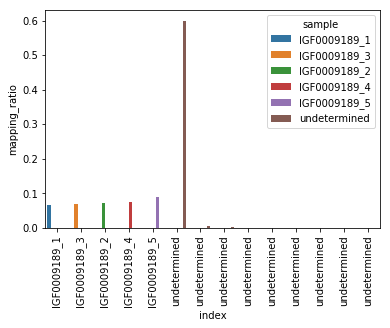

In [9]:
fig, ax=plt.subplots()
ax=sns.barplot(data=data, x='index',y='mapping_ratio',hue='sample')
labels=ax.set_xticklabels(data['sample'],rotation=90)
plt.show()

In [10]:
data=get_dataframe_from_stats_json(json_file='atanur_Stats.json')

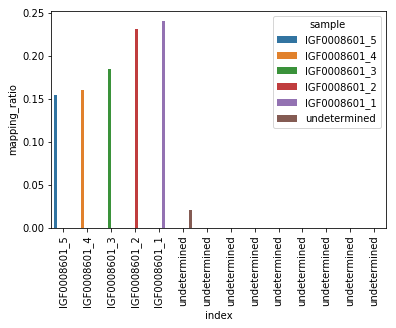

In [11]:
fig, ax=plt.subplots()
ax=sns.barplot(data=data, x='index',y='mapping_ratio',hue='sample')
labels=ax.set_xticklabels(data['sample'],rotation=90)
plt.show()

In [12]:
data=get_dataframe_from_stats_json(json_file='fisher_6-7-2017_amplicon_Stats.json')

In [15]:
#data

In [5]:
def get_dataframe_from_stats_json(json_file):
  with open(json_file,'r') as json_data:
    json_stats=json.load(json_data)
  
  data1=list()
  runid=json_stats['RunId']  
  total_read=None
  for row in json_stats['ConversionResults']:
    lane=row['LaneNumber']
    total_read=row['TotalClustersPF']
    for sample in row['DemuxResults']:
        sample_id=sample['SampleId']
        number_reads=sample['NumberReads']
        for index in sample['IndexMetrics']:
            index_seq=index['IndexSequence']
            data1.append({'lane':lane,
                          'sample':sample_id,
                          'index':index_seq,
                          'reads':number_reads,
                          'tag':'known',
                          'runid':runid,
                          'total_read':total_read})
  df1=pd.DataFrame(data1)
  df1=df1.sort_values(['reads'],ascending=True)
  
  data2=list()
  for row in json_stats['UnknownBarcodes']:
    lane=row['Lane']
    max_index=10
    index_count=0
    for barcode,count in sorted(row['Barcodes'].items(), key=lambda x: x[1], reverse=True):
        data2.append({'lane':lane,
                      'sample':'undetermined',
                      'index':barcode,
                      'reads':count,
                      'tag':'unknown',
                      'runid':runid,
                      'total_read':total_read})     
        
  df2=pd.DataFrame(data2)
  df=pd.concat([df1,df2])
  df['mapping_ratio']=df['reads'].map(lambda x: x/total_read)
  return df

In [200]:
data1=get_dataframe_from_stats_json(json_file='../../test_dir/stats_parsing/atanur_3-7-2017_starr_Stats.json')

In [201]:
data2=get_dataframe_from_stats_json(json_file='../../test_dir/stats_parsing/ferrer_10-8-2017_CRISPR_4_8_Stats.json')

In [202]:
data3=get_dataframe_from_stats_json(json_file='../../test_dir/stats_parsing/fisher_6-7-2017_amplicon_1_16_Stats.json')

In [203]:
data=pd.concat([data1,data2,data3])

In [179]:
summary_df=data.pivot_table(values=['reads'],index=['tag','lane','runid'],aggfunc=np.sum)

In [180]:
summary_df

reads
tag     lane runid                                        
known   1    170714_M03291_0074_000000000-AV4VF   11652742
        4    170908_K00345_0020_AHJMN5BBXX        16396268
        6    170908_K00345_0020_AHJMN5BBXX       401639091
unknown 1    170714_M03291_0074_000000000-AV4VF     958479
        4    170908_K00345_0020_AHJMN5BBXX        27595744
        6    170908_K00345_0020_AHJMN5BBXX        12105689

In [181]:
processed_df=pd.DataFrame(columns=['id','known_read','unknown_read'])

In [182]:
processed_df

,id,known_read,unknown_read


In [108]:
for rid, rg in summary_df.groupby('runid'):
    for lid, lg in rg.groupby('lane'):
        known_reads=lg.loc['known']['reads'].values[0]
        unknown_reads=lg.loc['unknown']['reads'].values[0]
        runid='{0}_{1}'.format(rid, lid)
        df=pd.DataFrame([{'id':runid,'known_read':known_reads,'unknown_read':unknown_reads}])
        processed_df=pd.concat([df,processed_df])

NameError: name 'processed_df' is not defined

In [13]:
def generate_pct(x):
    known_read=int(x['known_read'])
    unknown_read=int(x['unknown_read'])
    known_pct=(known_read/(known_read+unknown_read))*100
    x['known_pct']=known_pct
    unknown_pct=(unknown_read/(known_read+unknown_read))*100
    x['unknown_pct']=unknown_pct
    return x

In [186]:
processed_df=processed_df.apply(lambda x: generate_pct(x), axis=1)

In [188]:
processed_df=processed_df.set_index('id')

In [189]:
fig, ax=plt.subplots()

In [190]:
processed_df[['known_pct','unknown_pct']].plot(ax=ax,kind='bar',stacked=True)

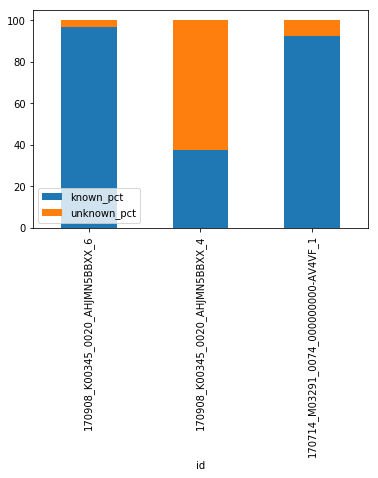

In [191]:
plt.show()

In [192]:
import math

In [194]:
math.log2(64015463)

25.931917095869373

In [198]:
math.log2(0.154701)

-2.692445572370756

In [206]:
data['log_total_read']=data['total_read'].map(lambda x: math.log2(x))

In [228]:
fig, ax=plt.subplots()

In [229]:
for gk,gr in data.groupby('tag'):
    if gk=='known':
      ax.scatter(x=gr['log_total_read'],y=gr['mapping_ratio'],color='green')
    elif gk=='unknown':
      ax.scatter(x=gr['log_total_read'],y=gr['mapping_ratio'],color='blue')  

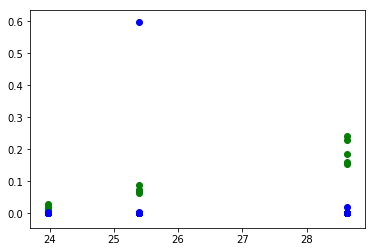

In [230]:
plt.show()

In [3]:
fdata=get_dataframe_from_stats_json(json_file='../../test_dir/test5_barcode_stats/Stats/Stats.json')

In [6]:
fknown=fdata.groupby('tag').get_group('known')

In [11]:
fknown=fknown.set_index('index')

In [36]:
import matplotlib

In [37]:
matplotlib.style.use('ggplot')

In [40]:
fknown['mapping_ratio'].hist(bins=50,)

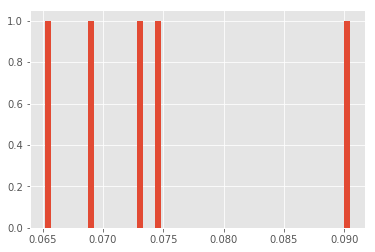

In [41]:
plt.show()

In [42]:
fknown['mapping_ratio'].head()

index
ACATCGAT    0.065216
GATCTGAT    0.069209
ATTGGCAT    0.072829
TACAAGAT    0.074330
TTTCACAT    0.090457
Name: mapping_ratio, dtype: float64

In [49]:
fknown['mapping_ratio'].plot(kind='kde')

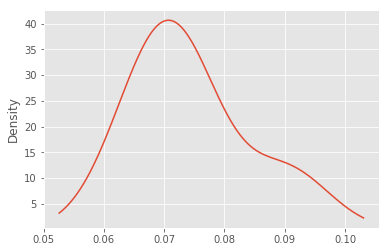

In [50]:
plt.show()

In [169]:
fig, ax=plt.subplots()

In [170]:
for gn, gr in fdata.groupby('tag'):
    if gn=='known':
        gr['reads'].plot(ax=ax,kind='hist',color='green')
    elif gn=='unknown':
        df=gr.sort_values(['reads'],ascending=False).head(5)
        df['reads'].plot(ax=ax,kind='hist',color='blue')

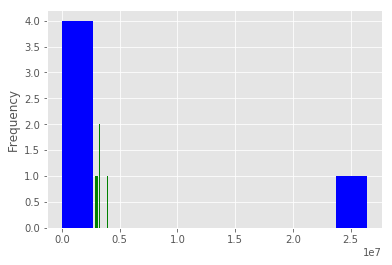

In [171]:
plt.show()

In [101]:
for gn,gr in fdata.groupby('tag'):
    if gn=='known':
        km=gr['mapping_ratio'].mean()
    elif gn=='unknown':
        umx=gr['mapping_ratio'].max()

In [104]:
km/umx

0.12420747065877519

In [147]:
bad_data=get_dataframe_from_stats_json(json_file='../../test_dir/test5_barcode_stats/incorrect_mask_Stats.json')

In [148]:
summary_df=bad_data.pivot_table(values=['reads'],index=['tag','lane','runid'],aggfunc=np.sum)

In [149]:
summary_df

,,,reads
tag,lane,runid,
known,1,170901_M03291_0083_000000000-B8LHK,6513
unknown,1,170901_M03291_0083_000000000-B8LHK,15669694


In [150]:
processed_df=pd.DataFrame(columns=['id','known_read','unknown_read'])

In [151]:
for rid, rg in summary_df.groupby('runid'):
    for lid, lg in rg.groupby('lane'):
        known_reads=lg.loc['known']['reads'].values[0]
        unknown_reads=lg.loc['unknown']['reads'].values[0]
        runid='{0}_{1}'.format(rid, lid)
        df=pd.DataFrame([{'id':runid,'known_read':known_reads,'unknown_read':unknown_reads}])
        processed_df=pd.concat([df,processed_df])

In [152]:
processed_df

,id,known_read,unknown_read
0,170901_M03291_0083_000000000-B8LHK_1,6513,15669694


In [153]:
processed_df=processed_df.apply(lambda x: generate_pct(x), axis=1)

In [154]:
processed_df=processed_df.set_index('id')

In [165]:
fig, ax=plt.subplots()

In [166]:
processed_df[['known_pct','unknown_pct']].plot(ax=ax,kind='bar',color=['blue','orange'],stacked=True)

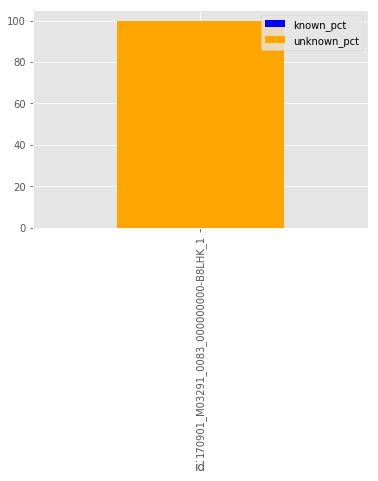

In [167]:
plt.show()

In [6]:
good_data=get_dataframe_from_stats_json(json_file='../../test_dir/test5_barcode_stats/correct_mask_Stats.json')

In [7]:
summary_df=good_data.pivot_table(values=['reads'],index=['tag','lane','runid'],aggfunc=np.sum)

In [8]:
summary_df

,,,reads
tag,lane,runid,
known,1,170901_M03291_0083_000000000-B8LHK,18638488
unknown,1,170901_M03291_0083_000000000-B8LHK,580246


In [9]:
processed_df=pd.DataFrame(columns=['id','known_read','unknown_read'])

In [10]:
for rid, rg in summary_df.groupby('runid'):
    for lid, lg in rg.groupby('lane'):
        known_reads=lg.loc['known']['reads'].values[0]
        unknown_reads=lg.loc['unknown']['reads'].values[0]
        runid='{0}_{1}'.format(rid, lid)
        df=pd.DataFrame([{'id':runid,'known_read':known_reads,'unknown_read':unknown_reads}])
        processed_df=pd.concat([df,processed_df])

In [11]:
processed_df

,id,known_read,unknown_read
0,170901_M03291_0083_000000000-B8LHK_1,18638488,580246


In [14]:
processed_df=processed_df.apply(lambda x: generate_pct(x), axis=1)

In [15]:
processed_df=processed_df.set_index('id')

In [144]:
fig, ax=plt.subplots()

In [145]:
processed_df[['known_pct','unknown_pct']].plot(ax=ax,kind='bar',color=['blue','orange'],stacked=True)

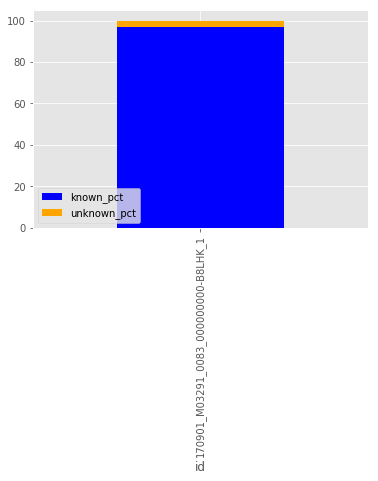

In [146]:
plt.show()

In [16]:
test_4_6_data=get_dataframe_from_stats_json(json_file='../../test_dir/test5_barcode_stats/test4_6_Stats.json')

In [17]:
summary_df=test_4_6_data.pivot_table(values=['reads'],index=['tag','lane','runid'],aggfunc=np.sum)

In [18]:
summary_df

,,,reads
tag,lane,runid,
known,4,170908_K00345_0020_AHJMN5BBXX,16501285
unknown,4,170908_K00345_0020_AHJMN5BBXX,27550635


In [19]:
processed_df=pd.DataFrame(columns=['id','known_read','unknown_read'])

In [20]:
for rid, rg in summary_df.groupby('runid'):
    for lid, lg in rg.groupby('lane'):
        known_reads=lg.loc['known']['reads'].values[0]
        unknown_reads=lg.loc['unknown']['reads'].values[0]
        runid='{0}_{1}'.format(rid, lid)
        df=pd.DataFrame([{'id':runid,'known_read':known_reads,'unknown_read':unknown_reads}])
        processed_df=pd.concat([df,processed_df])

In [21]:
processed_df

,id,known_read,unknown_read
0,170908_K00345_0020_AHJMN5BBXX_4,16501285,27550635


In [22]:
processed_df=processed_df.apply(lambda x: generate_pct(x), axis=1)

In [23]:
processed_df=processed_df.set_index('id')

In [180]:
fig, ax=plt.subplots()

In [181]:
processed_df[['known_pct','unknown_pct']].plot(ax=ax,kind='bar',color=['blue','orange'],stacked=True)

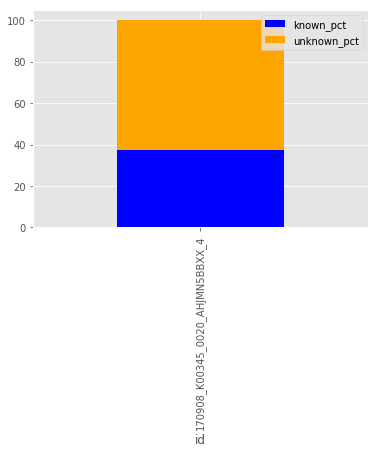

In [182]:
plt.show()

In [1]:
indexes=['GTATGC','CCCCCC']

In [2]:
indexes

['GTATGC', 'CCCCCC']

In [25]:
index_s=pd.Series(indexes)

In [26]:
index_s

0    GTATGC
1    CCCCCC
dtype: object

In [27]:
t_u=test_4_6_data.groupby('tag').get_group('unknown')

In [ ]:
test_4_6_d